# Changing Enviroment
### Also checking if it is changed succesfully or not:-

In [ ]:
import os
if 'COLAB_GPU' in os.environ:
  print("YES")
else:
  print("No")

YES


# Installing the Ultralytics (version 8.0.20)

In [ ]:
!pip install ultralytics==8.0.20

# Importing important modules

In [ ]:
!pip install roboflow

In [ ]:
import ultralytics
import roboflow
import pandas as pd

# IMPORTING DATASET:(From Roboflow)

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="avKOdH27f74pfZkP8yjV")
project = rf.workspace("ai-solutions-nbzxp").project("facial-expression-ai-solution")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-Expression---AI-Solution-1 in yolov8:: 100%|██████████| 9240/9240 [00:01<00:00, 6809.91it/s]


# Training The DataSet

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/Facial-Expression---AI-Solution-1/data.yaml epochs=10 imgsz=440 batch=16

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(self.amp):
       1/10       1.2G       1.06      2.843      1.176         60        448:  74% 186/250 [00:48<00:15,  4.03it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
       1/10       1.2G       1.06      2.838      1.175         71        448:  75% 187/250 [00:48<00:17,  3.54it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
       1/10       1.2G       1.06      2.836      1.175         30        448:  75% 188/250 [00:48<00:16,  3.72it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/train

#Desplaying Results

In [ ]:
!ls '/content/runs/detect/train2/'

args.yaml					    F1_curve.png  R_curve.png  weights
confusion_matrix.png				    P_curve.png   results.csv
events.out.tfevents.1736955372.8eb511950b20.4760.0  PR_curve.png  results.png


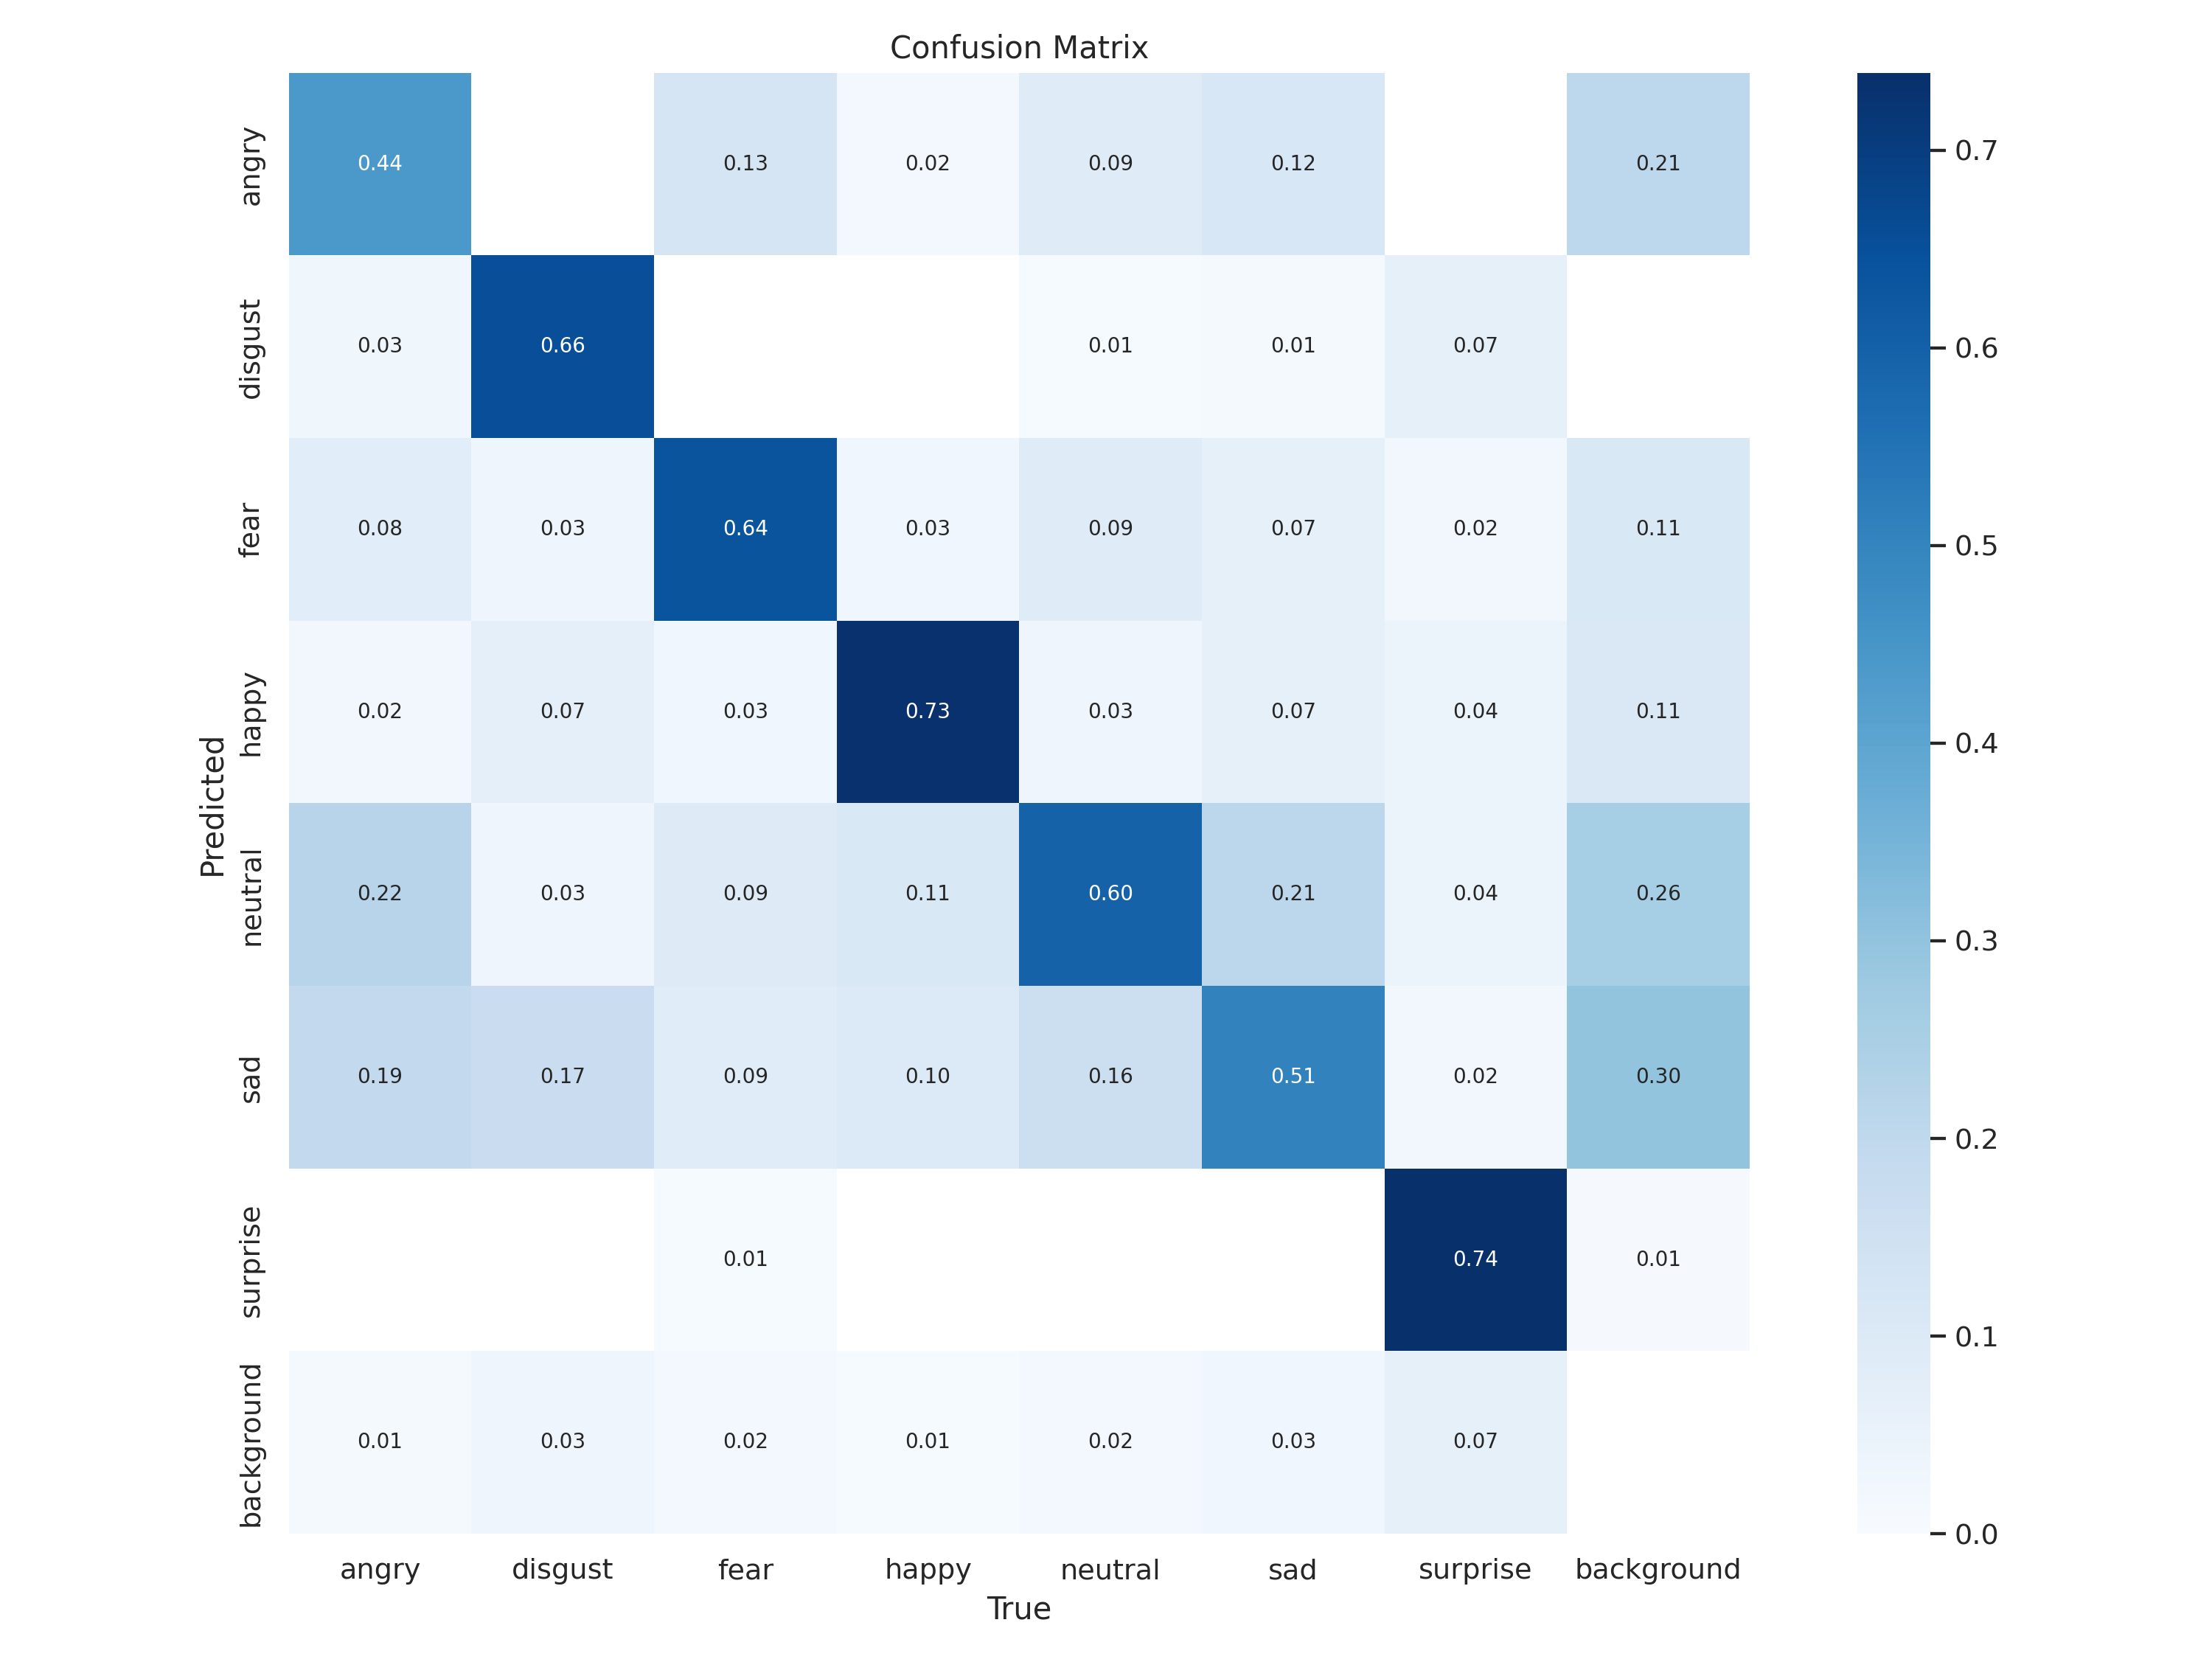

In [ ]:
res = "/content/runs/detect/train2/"
from IPython.display import Image, display

Image(filename = f'{res}confusion_matrix.png')

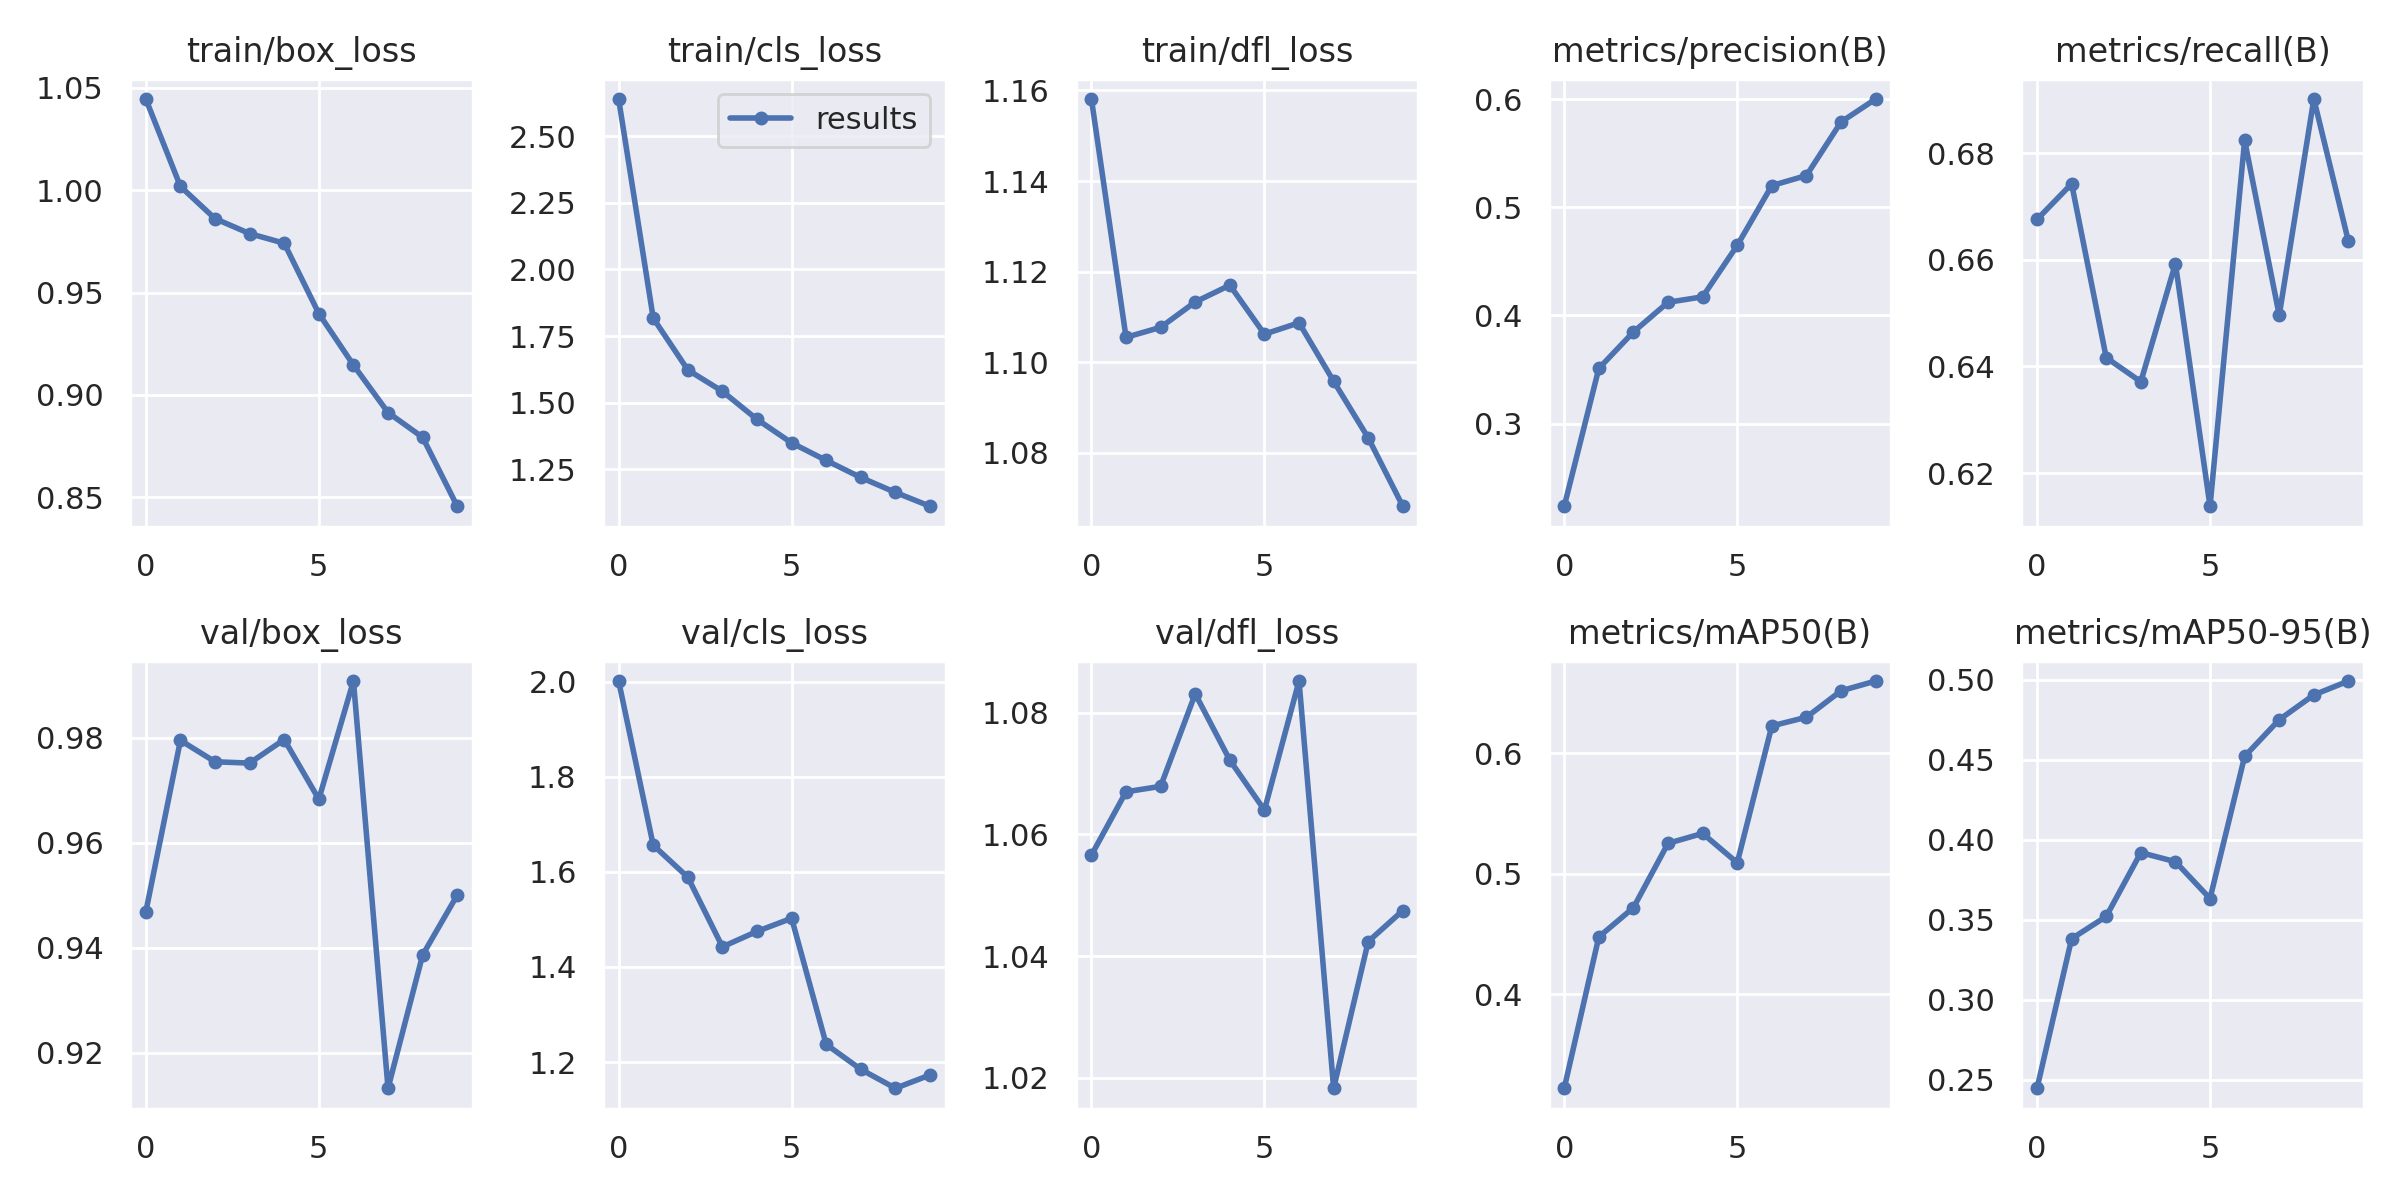

In [ ]:
res = "/content/runs/detect/train2/"
from IPython.display import Image, display

Image(filename = f'{res}results.png')

In [ ]:
df = pd.read_csv(f'{res}results.csv')
print(df.head(5))

                  epoch        train/box_loss        train/cls_loss  \
0                     0               1.04450                2.6395   
1                     1               1.00180                1.8173   
2                     2               0.98608                1.6231   
3                     3               0.97878                1.5428   
4                     4               0.97406                1.4376   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
0                1.1581               0.22356  ...                2.0015   
1                1.1055               0.35100  ...                1.6562   
2                1.1077               0.38468  ...                1.5888   
3                1.1133               0.41212  ...                1.4424   
4                1.1170               0.41718  ...                1.4749   

           val/dfl_loss                lr/pg0                lr/pg1  \
0                1.0566              0.070120

#Validate The Model

In [ ]:
os.chdir("/content")

In [ ]:
%pwd

'/content'

In [ ]:
os.chdir("/content/RandomTesting/runs")

In [ ]:
URL = "https://drive.google.com/file/d/1bO1gsrrsO3H_Vfhg1VXTtRi3ymBn-RS7/view?usp=sharing"
id = '1bO1gsrrsO3H_Vfhg1VXTtRi3ymBn-RS7'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bO1gsrrsO3H_Vfhg1VXTtRi3ymBn-RS7' -o inputImage.jpg

# Test Your Model On An Arbitary Image To Detect Facial Expression

In [ ]:
os.chdir("/content/RandomTesting/")

In [ ]:
weights= "/content/runs/detect/train2/weights"

!yolo task=detect mode=predict model={weights}/best.pt conf=.25 source = 'inputImage.jpg' save = True


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2025-0

# Checking Results


### Input Image:

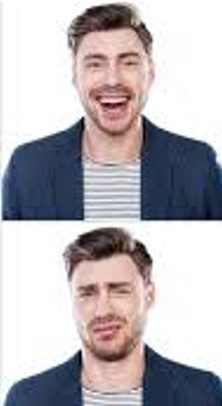

In [36]:
display(Image(filename='/content/inputImage.jpg'))

# Output Image:


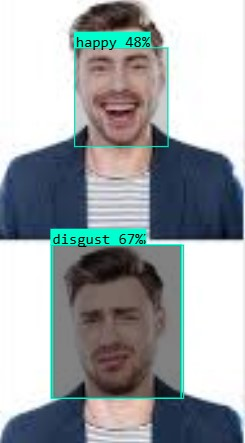

In [37]:
display(Image(filename='/content/runs/detect/predict.jpg'))